<a href="https://colab.research.google.com/github/jjooki/Player-Contact-Detection/blob/main/EDA_cj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
data_path = '/content/drive/MyDrive/Colab Notebooks/kaggle/Player-Contact-Detection/data/'

train_baseline_helmets = pd.read_csv(data_path + 'train_baseline_helmets.csv')
train_labels = pd.read_csv(data_path + 'train_labels.csv')
train_player_tracking = pd.read_csv(data_path + 'train_player_tracking.csv')
train_video_metadata = pd.read_csv(data_path + 'train_video_metadata.csv')

test_baseline_helmets = pd.read_csv(data_path + 'test_baseline_helmets.csv')
test_player_tracking = pd.read_csv(data_path + 'test_player_tracking.csv')
test_video_metadata = pd.read_csv(data_path + 'test_video_metadata.csv')

In [6]:
train_labels

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0
...,...,...,...,...,...,...,...
4721613,58582_003121_91_48220_G,58582_003121,2021-10-12T02:42:29.100Z,91,48220,G,0
4721614,58582_003121_91_47906_G,58582_003121,2021-10-12T02:42:29.100Z,91,47906,G,0
4721615,58582_003121_91_38557_G,58582_003121,2021-10-12T02:42:29.100Z,91,38557,G,0
4721616,58582_003121_91_47872_G,58582_003121,2021-10-12T02:42:29.100Z,91,47872,G,0


In [4]:
train_contact = train_labels[train_labels.contact == 1]
display(train_contact)

train_ground_contact = train_contact[train_contact.nfl_player_id_2 == 'G']
train_player_contact = train_contact[train_contact.nfl_player_id_2 != 'G']
train_player_contact.nfl_player_id_2 = train_player_contact.nfl_player_id_2.apply(lambda x: int(x))

display(train_player_contact)
display(train_ground_contact)

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
809,58168_003392_3_41944_42565,58168_003392,2020-09-11T03:01:48.400Z,3,41944,42565,1
1062,58168_003392_4_41944_42565,58168_003392,2020-09-11T03:01:48.500Z,4,41944,42565,1
1163,58168_003392_4_37084_38567,58168_003392,2020-09-11T03:01:48.500Z,4,37084,38567,1
1289,58168_003392_5_43854_46445,58168_003392,2020-09-11T03:01:48.600Z,5,43854,46445,1
1315,58168_003392_5_41944_42565,58168_003392,2020-09-11T03:01:48.600Z,5,41944,42565,1
...,...,...,...,...,...,...,...
4720589,58582_003121_87_39971_G,58582_003121,2021-10-12T02:42:28.700Z,87,39971,G,1
4720842,58582_003121_88_39971_G,58582_003121,2021-10-12T02:42:28.800Z,88,39971,G,1
4721095,58582_003121_89_39971_G,58582_003121,2021-10-12T02:42:28.900Z,89,39971,G,1
4721348,58582_003121_90_39971_G,58582_003121,2021-10-12T02:42:29.000Z,90,39971,G,1


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
809,58168_003392_3_41944_42565,58168_003392,2020-09-11T03:01:48.400Z,3,41944,42565,1
1062,58168_003392_4_41944_42565,58168_003392,2020-09-11T03:01:48.500Z,4,41944,42565,1
1163,58168_003392_4_37084_38567,58168_003392,2020-09-11T03:01:48.500Z,4,37084,38567,1
1289,58168_003392_5_43854_46445,58168_003392,2020-09-11T03:01:48.600Z,5,43854,46445,1
1315,58168_003392_5_41944_42565,58168_003392,2020-09-11T03:01:48.600Z,5,41944,42565,1
...,...,...,...,...,...,...,...
4708597,58582_003121_40_45009_46284,58582_003121,2021-10-12T02:42:24.000Z,40,45009,46284,1
4711814,58582_003121_53_39971_46155,58582_003121,2021-10-12T02:42:25.300Z,53,39971,46155,1
4712067,58582_003121_54_39971_46155,58582_003121,2021-10-12T02:42:25.400Z,54,39971,46155,1
4712320,58582_003121_55_39971_46155,58582_003121,2021-10-12T02:42:25.500Z,55,39971,46155,1


,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
2772,58168_003392_10_38567_G,58168_003392,2020-09-11T03:01:49.100Z,10,38567,G,1
3025,58168_003392_11_38567_G,58168_003392,2020-09-11T03:01:49.200Z,11,38567,G,1
3278,58168_003392_12_38567_G,58168_003392,2020-09-11T03:01:49.300Z,12,38567,G,1
3531,58168_003392_13_38567_G,58168_003392,2020-09-11T03:01:49.400Z,13,38567,G,1
3784,58168_003392_14_38567_G,58168_003392,2020-09-11T03:01:49.500Z,14,38567,G,1
...,...,...,...,...,...,...,...
4720589,58582_003121_87_39971_G,58582_003121,2021-10-12T02:42:28.700Z,87,39971,G,1
4720842,58582_003121_88_39971_G,58582_003121,2021-10-12T02:42:28.800Z,88,39971,G,1
4721095,58582_003121_89_39971_G,58582_003121,2021-10-12T02:42:28.900Z,89,39971,G,1
4721348,58582_003121_90_39971_G,58582_003121,2021-10-12T02:42:29.000Z,90,39971,G,1


In [ ]:
train_labels

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0
...,...,...,...,...,...,...,...
4721613,58582_003121_91_48220_G,58582_003121,2021-10-12T02:42:29.100Z,91,48220,G,0
4721614,58582_003121_91_47906_G,58582_003121,2021-10-12T02:42:29.100Z,91,47906,G,0
4721615,58582_003121_91_38557_G,58582_003121,2021-10-12T02:42:29.100Z,91,38557,G,0
4721616,58582_003121_91_47872_G,58582_003121,2021-10-12T02:42:29.100Z,91,47872,G,0


In [ ]:
train_baseline_helmets

,game_play,game_key,play_id,view,video,frame,nfl_player_id,player_label,left,width,top,height
0,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,39947,H72,946,25,293,34
1,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,37211,H42,151,25,267,33
2,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,38590,H70,810,25,293,35
3,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,44822,H15,681,26,254,33
4,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,41944,V92,680,23,303,33
...,...,...,...,...,...,...,...,...,...,...,...,...
3783611,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,842,52500,H13,497,24,316,25
3783612,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,842,52493,V32,914,23,356,26
3783613,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,842,45009,V97,30,29,446,23
3783614,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,842,46155,H89,750,18,338,26


In [ ]:
train_baseline_helmets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783616 entries, 0 to 3783615
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   game_play      object
 1   game_key       int64 
 2   play_id        int64 
 3   view           object
 4   video          object
 5   frame          int64 
 6   nfl_player_id  int64 
 7   player_label   object
 8   left           int64 
 9   width          int64 
 10  top            int64 
 11  height         int64 
dtypes: int64(8), object(4)
memory usage: 346.4+ MB


In [ ]:
train_labels

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0
...,...,...,...,...,...,...,...
4721613,58582_003121_91_48220_G,58582_003121,2021-10-12T02:42:29.100Z,91,48220,G,0
4721614,58582_003121_91_47906_G,58582_003121,2021-10-12T02:42:29.100Z,91,47906,G,0
4721615,58582_003121_91_38557_G,58582_003121,2021-10-12T02:42:29.100Z,91,38557,G,0
4721616,58582_003121_91_47872_G,58582_003121,2021-10-12T02:42:29.100Z,91,47872,G,0


In [ ]:
train_player_tracking

,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
0,58580_001136,58580,1136,44830,2021-10-10T21:08:20.900Z,-108,away,CB,22,61.59,42.60,1.11,0.11,320.33,263.93,0.71,-0.64
1,58580_001136,58580,1136,47800,2021-10-10T21:08:20.900Z,-108,away,DE,97,59.48,26.81,0.23,0.01,346.84,247.16,1.29,0.90
2,58580_001136,58580,1136,52444,2021-10-10T21:08:20.900Z,-108,away,FS,29,72.19,31.46,0.61,0.06,11.77,247.69,0.63,-0.33
3,58580_001136,58580,1136,46206,2021-10-10T21:08:20.900Z,-108,home,TE,86,57.37,22.12,0.37,0.04,127.85,63.63,0.69,0.62
4,58580_001136,58580,1136,52663,2021-10-10T21:08:20.900Z,-108,away,ILB,48,63.25,27.50,0.51,0.05,183.62,253.71,0.31,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353048,58575_003081,58575,3081,48476,2021-10-10T19:22:06.800Z,140,away,CB,40,72.28,51.80,1.59,0.17,345.36,342.68,0.49,-0.41
1353049,58575_003081,58575,3081,44887,2021-10-10T19:22:06.800Z,140,away,ILB,45,74.76,54.50,0.98,0.10,342.39,354.46,0.63,-0.24
1353050,58575_003081,58575,3081,44174,2021-10-10T19:22:06.800Z,140,away,ILB,49,74.54,55.75,1.12,0.11,352.79,349.20,0.63,0.46
1353051,58575_003081,58575,3081,45217,2021-10-10T19:22:06.800Z,140,away,TE,82,80.44,48.77,1.93,0.20,340.78,346.51,0.53,-0.51


In [ ]:
train_video_metadata

,game_play,game_key,play_id,view,start_time,end_time,snap_time
0,58168_003392,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
1,58168_003392,58168,3392,Sideline,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
2,58172_003247,58172,3247,Endzone,2020-09-13T19:30:42.414Z,2020-09-13T19:31:00.524Z,2020-09-13T19:30:47.414Z
3,58172_003247,58172,3247,Sideline,2020-09-13T19:30:42.414Z,2020-09-13T19:31:00.524Z,2020-09-13T19:30:47.414Z
4,58173_003606,58173,3606,Endzone,2020-09-13T19:45:07.527Z,2020-09-13T19:45:26.438Z,2020-09-13T19:45:12.527Z
...,...,...,...,...,...,...,...
475,58580_003294,58580,3294,Sideline,2021-10-10T22:49:20.085Z,2021-10-10T22:49:33.891Z,2021-10-10T22:49:25.085Z
476,58581_000040,58581,40,Endzone,2021-10-11T00:22:39.997Z,2021-10-11T00:22:52.068Z,2021-10-11T00:22:44.997Z
477,58581_000040,58581,40,Sideline,2021-10-11T00:22:39.997Z,2021-10-11T00:22:52.068Z,2021-10-11T00:22:44.997Z
478,58582_003121,58582,3121,Endzone,2021-10-12T02:42:15.078Z,2021-10-12T02:42:29.118Z,2021-10-12T02:42:20.078Z


In [ ]:
test_baseline_helmets

,game_play,game_key,play_id,view,video,frame,nfl_player_id,player_label,left,width,top,height
0,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,39947,H72,946,25,293,34
1,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,37211,H42,151,25,267,33
2,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,38590,H70,810,25,293,35
3,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,44822,H15,681,26,254,33
4,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,41944,V92,680,23,303,33
...,...,...,...,...,...,...,...,...,...,...,...,...
47325,58172_003247,58172,3247,Sideline,58172_003247_Sideline.mp4,1082,52852,H38,460,40,315,45
47326,58172_003247,58172,3247,Sideline,58172_003247_Sideline.mp4,1082,41937,H57,729,43,473,45
47327,58172_003247,58172,3247,Sideline,58172_003247_Sideline.mp4,1082,48233,V45,126,33,504,35
47328,58172_003247,58172,3247,Sideline,58172_003247_Sideline.mp4,1082,48241,V22,446,38,511,45


In [ ]:
test_player_tracking

,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
0,58172_003247,58172,3247,41937,2020-09-13T19:30:20.200Z,-272,home,MLB,57,64.28,11.29,4.82,0.46,20.74,12.43,3.13,3.00
1,58172_003247,58172,3247,45345,2020-09-13T19:30:20.200Z,-272,away,ILB,50,76.03,36.74,3.15,0.32,179.52,184.91,1.87,-1.81
2,58172_003247,58172,3247,46205,2020-09-13T19:30:20.200Z,-272,home,DE,98,65.64,15.74,1.80,0.20,6.73,339.85,0.69,-0.68
3,58172_003247,58172,3247,43406,2020-09-13T19:30:20.200Z,-272,home,WR,14,36.35,14.94,1.81,0.18,330.50,344.03,0.62,0.39
4,58172_003247,58172,3247,48233,2020-09-13T19:30:20.200Z,-272,away,RB,45,76.10,32.15,3.36,0.34,166.59,180.56,0.88,-0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14867,58168_003392,58168,3392,43395,2020-09-11T03:01:57.300Z,92,away,FS,23,51.03,13.63,1.70,0.17,21.01,18.32,0.35,-0.20
14868,58168_003392,58168,3392,39947,2020-09-11T03:01:57.300Z,92,home,T,72,42.73,18.52,1.19,0.13,331.22,332.97,0.58,-0.56
14869,58168_003392,58168,3392,44822,2020-09-11T03:01:57.300Z,92,home,QB,15,35.01,18.68,1.48,0.15,165.22,162.66,0.38,-0.07
14870,58168_003392,58168,3392,38590,2020-09-11T03:01:57.300Z,92,home,G,70,43.72,18.24,1.54,0.16,341.08,336.00,0.41,-0.41


In [ ]:
test_video_metadata

,game_play,game_key,play_id,view,start_time,end_time,snap_time
0,58168_003392,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
1,58168_003392,58168,3392,Sideline,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
2,58172_003247,58172,3247,Endzone,2020-09-13T19:30:42.414Z,2020-09-13T19:31:00.524Z,2020-09-13T19:30:47.414Z
3,58172_003247,58172,3247,Sideline,2020-09-13T19:30:42.414Z,2020-09-13T19:31:00.524Z,2020-09-13T19:30:47.414Z


In [ ]:
print(len(train_player_contact.game_play.unique()))
train_player_contact

236


,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
809,58168_003392_3_41944_42565,58168_003392,2020-09-11T03:01:48.400Z,3,41944,42565,1
1062,58168_003392_4_41944_42565,58168_003392,2020-09-11T03:01:48.500Z,4,41944,42565,1
1163,58168_003392_4_37084_38567,58168_003392,2020-09-11T03:01:48.500Z,4,37084,38567,1
1289,58168_003392_5_43854_46445,58168_003392,2020-09-11T03:01:48.600Z,5,43854,46445,1
1315,58168_003392_5_41944_42565,58168_003392,2020-09-11T03:01:48.600Z,5,41944,42565,1
...,...,...,...,...,...,...,...
4708597,58582_003121_40_45009_46284,58582_003121,2021-10-12T02:42:24.000Z,40,45009,46284,1
4711814,58582_003121_53_39971_46155,58582_003121,2021-10-12T02:42:25.300Z,53,39971,46155,1
4712067,58582_003121_54_39971_46155,58582_003121,2021-10-12T02:42:25.400Z,54,39971,46155,1
4712320,58582_003121_55_39971_46155,58582_003121,2021-10-12T02:42:25.500Z,55,39971,46155,1


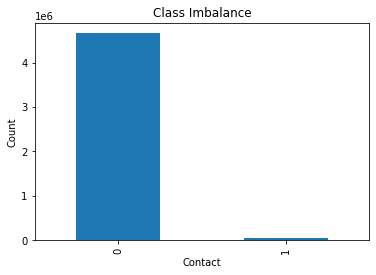

In [ ]:
train_labels.contact.value_counts().plot(kind='bar', xlabel='Contact', ylabel='Count', title='Class Imbalance')

In [ ]:
train_labels.contact.value_counts()
print(f'{6452200/4657096: .3f}%')

 1.385%


In [ ]:
train_player_tracking

,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
0,58580_001136,58580,1136,44830,2021-10-10T21:08:20.900Z,-108,away,CB,22,61.59,42.60,1.11,0.11,320.33,263.93,0.71,-0.64
1,58580_001136,58580,1136,47800,2021-10-10T21:08:20.900Z,-108,away,DE,97,59.48,26.81,0.23,0.01,346.84,247.16,1.29,0.90
2,58580_001136,58580,1136,52444,2021-10-10T21:08:20.900Z,-108,away,FS,29,72.19,31.46,0.61,0.06,11.77,247.69,0.63,-0.33
3,58580_001136,58580,1136,46206,2021-10-10T21:08:20.900Z,-108,home,TE,86,57.37,22.12,0.37,0.04,127.85,63.63,0.69,0.62
4,58580_001136,58580,1136,52663,2021-10-10T21:08:20.900Z,-108,away,ILB,48,63.25,27.50,0.51,0.05,183.62,253.71,0.31,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353048,58575_003081,58575,3081,48476,2021-10-10T19:22:06.800Z,140,away,CB,40,72.28,51.80,1.59,0.17,345.36,342.68,0.49,-0.41
1353049,58575_003081,58575,3081,44887,2021-10-10T19:22:06.800Z,140,away,ILB,45,74.76,54.50,0.98,0.10,342.39,354.46,0.63,-0.24
1353050,58575_003081,58575,3081,44174,2021-10-10T19:22:06.800Z,140,away,ILB,49,74.54,55.75,1.12,0.11,352.79,349.20,0.63,0.46
1353051,58575_003081,58575,3081,45217,2021-10-10T19:22:06.800Z,140,away,TE,82,80.44,48.77,1.93,0.20,340.78,346.51,0.53,-0.51


In [ ]:
train_player_contact

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
809,58168_003392_3_41944_42565,58168_003392,2020-09-11T03:01:48.400Z,3,41944,42565,1
1062,58168_003392_4_41944_42565,58168_003392,2020-09-11T03:01:48.500Z,4,41944,42565,1
1163,58168_003392_4_37084_38567,58168_003392,2020-09-11T03:01:48.500Z,4,37084,38567,1
1289,58168_003392_5_43854_46445,58168_003392,2020-09-11T03:01:48.600Z,5,43854,46445,1
1315,58168_003392_5_41944_42565,58168_003392,2020-09-11T03:01:48.600Z,5,41944,42565,1
...,...,...,...,...,...,...,...
4708597,58582_003121_40_45009_46284,58582_003121,2021-10-12T02:42:24.000Z,40,45009,46284,1
4711814,58582_003121_53_39971_46155,58582_003121,2021-10-12T02:42:25.300Z,53,39971,46155,1
4712067,58582_003121_54_39971_46155,58582_003121,2021-10-12T02:42:25.400Z,54,39971,46155,1
4712320,58582_003121_55_39971_46155,58582_003121,2021-10-12T02:42:25.500Z,55,39971,46155,1


In [ ]:
train_player_tracking[train_player_tracking.game_play == '58168_003392']

,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
1073492,58168_003392,58168,3392,38590,2020-09-11T03:01:29.600Z,-185,home,G,70,37.01,24.51,0.13,0.01,217.27,161.70,0.12,0.09
1073493,58168_003392,58168,3392,43854,2020-09-11T03:01:29.600Z,-185,away,OLB,57,42.34,20.73,0.53,0.05,175.99,318.75,1.07,1.05
1073494,58168_003392,58168,3392,41257,2020-09-11T03:01:29.600Z,-185,away,CB,21,45.06,24.04,0.17,0.01,9.53,238.00,0.17,0.16
1073495,58168_003392,58168,3392,41944,2020-09-11T03:01:29.600Z,-185,away,DT,92,42.71,22.99,0.31,0.03,314.68,273.74,0.13,-0.09
1073496,58168_003392,58168,3392,42386,2020-09-11T03:01:29.600Z,-185,away,ILB,55,41.96,22.22,0.53,0.05,148.58,75.87,0.70,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083042,58168_003392,58168,3392,43395,2020-09-11T03:01:57.300Z,92,away,FS,23,51.03,13.63,1.70,0.17,21.01,18.32,0.35,-0.20
1083043,58168_003392,58168,3392,39947,2020-09-11T03:01:57.300Z,92,home,T,72,42.73,18.52,1.19,0.13,331.22,332.97,0.58,-0.56
1083044,58168_003392,58168,3392,44822,2020-09-11T03:01:57.300Z,92,home,QB,15,35.01,18.68,1.48,0.15,165.22,162.66,0.38,-0.07
1083045,58168_003392,58168,3392,38590,2020-09-11T03:01:57.300Z,92,home,G,70,43.72,18.24,1.54,0.16,341.08,336.00,0.41,-0.41


In [24]:
game_df = train_player_tracking[train_player_tracking.game_play == '58168_003392']
game_df = game_df[game_df.step >= 0]
print(game_df.step.max())
game_df

92


,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
1081001,58168_003392,58168,3392,41944,2020-09-11T03:01:48.100Z,0,away,DT,92,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81
1081002,58168_003392,58168,3392,38556,2020-09-11T03:01:48.100Z,0,away,OLB,59,41.93,30.61,0.67,0.05,232.50,227.00,1.82,1.61
1081003,58168_003392,58168,3392,42386,2020-09-11T03:01:48.100Z,0,away,ILB,55,45.87,23.89,0.61,0.06,221.19,269.45,1.11,1.10
1081004,58168_003392,58168,3392,38567,2020-09-11T03:01:48.100Z,0,home,T,71,40.37,19.88,0.66,0.07,136.70,88.92,0.90,0.89
1081005,58168_003392,58168,3392,42565,2020-09-11T03:01:48.100Z,0,home,C,62,40.75,23.43,0.86,0.08,183.83,94.13,1.55,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083042,58168_003392,58168,3392,43395,2020-09-11T03:01:57.300Z,92,away,FS,23,51.03,13.63,1.70,0.17,21.01,18.32,0.35,-0.20
1083043,58168_003392,58168,3392,39947,2020-09-11T03:01:57.300Z,92,home,T,72,42.73,18.52,1.19,0.13,331.22,332.97,0.58,-0.56
1083044,58168_003392,58168,3392,44822,2020-09-11T03:01:57.300Z,92,home,QB,15,35.01,18.68,1.48,0.15,165.22,162.66,0.38,-0.07
1083045,58168_003392,58168,3392,38590,2020-09-11T03:01:57.300Z,92,home,G,70,43.72,18.24,1.54,0.16,341.08,336.00,0.41,-0.41


In [25]:
game_df.team.unique()

array(['away', 'home'], dtype=object)

In [1]:
M = 13
N = 7
_, ax = plt.subplots(M, N, figsize=(3*N, 3*M))

idx = 0
colormap = {
    'home': 'blue',
    'away': 'orange'
}
steps = game_df.step.unique()

for step in steps:
    if step == 0 or step == steps[-1]:
        continue
    m = idx // N
    n = idx % N
    print(m, n)
    main_df = game_df[game_df.step == step]
    sub1_df = game_df[game_df.step == step - 1]
    sub2_df = game_df[game_df.step == step + 1]

    ax[m][n].plot(main_df.x_position.tonumpy(), main_df.y_position,
                  c=main_df.team.map(colormap).to_numpy())
    ax[m][n].plot(sub1_df.x_position, sub1_df.y_position,
                  c=sub1_df.team.map(colormap).to_numpy(), alpha=0.4)
    ax[m][n].plot(sub2_df.x_position, sub2_df.y_position,
                  c=sub2_df.team.map(colormap).to_numpy(), alpha=0.4)
    
    idx += 1
plt.show()

NameError: ignored

In [ ]:
game_df.nfl_player_id.unique()

AttributeError: ignored

In [ ]:
a = game_df.step.unique()
a.sort()
a

array([-185, -184, -183, -182, -181, -180, -179, -178, -177, -176, -175,
       -174, -173, -172, -171, -170, -169, -168, -167, -166, -165, -164,
       -163, -162, -161, -160, -159, -158, -157, -156, -155, -154, -153,
       -152, -151, -150, -149, -148, -147, -146, -145, -144, -143, -142,
       -141, -140, -139, -138, -137, -136, -135, -134, -133, -132, -131,
       -130, -129, -128, -127, -126, -125, -124, -123, -122, -121, -120,
       -119, -118, -117, -116, -115, -114, -113, -112, -111, -110, -109,
       -108, -107, -106, -105, -104, -103, -102, -101, -100,  -99,  -98,
        -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,  -89,  -88,  -87,
        -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,  -78,  -77,  -76,
        -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,  -67,  -66,  -65,
        -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,  -56,  -55,  -54,
        -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,  -45,  -44,  -43,
        -42,  -41,  -40,  -39,  -38,  -37,  -36,  -

In [ ]:
game_df = train_player_tracking[train_player_tracking.game_play == '58168_003392']
game_df.nfl_player_id.unique()

array([38590, 43854, 41257, 41944, 42386, 47944, 43395, 47837, 46137,
       38556, 37211, 38567, 52440, 37084, 44869, 44822, 39947, 45695,
       42565, 46445, 40011, 46522])

In [ ]:
len(game_df.nfl_player_id.unique())

22

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['', 'globals()', 'locals()'],
 '_oh': {1: {...}},
 '_dh': ['/content'],
 'In': ['', 'globals()', 'locals()'],
 'Out': {1: {...}},
 'get_ipython': <bound method InteractiveShell.get_ipython of <google.colab._shell.Shell object at 0x7f31340cffd0>>,
 'exit': <IPython.core.autocall.ZMQExitAutocall at 0x7f313109f700>,
 'quit': <IPython.core.autocall.ZMQExitAutocall at 0x7f313109f700>,
 '_': {...},
 '__': '',
 '___': '',
 '_i': 'globals()',
 '_ii': '',
 '_iii': '',
 '_i1': 'globals()',
 '_1': {...},
 '_i2': 'locals()'}

,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
1081001,58168_003392,58168,3392,41944,2020-09-11T03:01:48.100Z,0,away,DT,92,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81
1081026,58168_003392,58168,3392,41944,2020-09-11T03:01:48.200Z,1,away,DT,92,41.94,22.79,0.85,0.09,229.50,283.49,0.91,0.90
1081063,58168_003392,58168,3392,41944,2020-09-11T03:01:48.300Z,2,away,DT,92,41.86,22.68,1.18,0.13,220.31,286.64,1.84,1.80
1081081,58168_003392,58168,3392,41944,2020-09-11T03:01:48.400Z,3,away,DT,92,41.78,22.56,1.43,0.15,217.49,287.37,1.56,1.51
1081104,58168_003392,58168,3392,41944,2020-09-11T03:01:48.500Z,4,away,DT,92,41.67,22.38,1.83,0.21,212.07,288.29,1.55,1.47
1081126,58168_003392,58168,3392,41944,2020-09-11T03:01:48.600Z,5,away,DT,92,41.58,22.20,2.00,0.20,208.64,295.28,1.38,1.23
1081138,58168_003392,58168,3392,41944,2020-09-11T03:01:48.700Z,6,away,DT,92,41.50,22.01,2.12,0.21,205.03,299.81,1.04,0.76


,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
1081005,58168_003392,58168,3392,42565,2020-09-11T03:01:48.100Z,0,home,C,62,40.75,23.43,0.86,0.08,183.83,94.13,1.55,1.54
1081034,58168_003392,58168,3392,42565,2020-09-11T03:01:48.200Z,1,home,C,62,40.75,23.33,1.09,0.11,184.95,97.64,1.39,1.38
1081058,58168_003392,58168,3392,42565,2020-09-11T03:01:48.300Z,2,home,C,62,40.72,23.19,1.37,0.14,188.26,102.43,1.40,1.39
1081085,58168_003392,58168,3392,42565,2020-09-11T03:01:48.400Z,3,home,C,62,40.70,23.02,1.66,0.17,189.20,109.99,1.29,1.28
1081101,58168_003392,58168,3392,42565,2020-09-11T03:01:48.500Z,4,home,C,62,40.68,22.85,1.80,0.18,188.04,117.12,0.84,0.84
1081122,58168_003392,58168,3392,42565,2020-09-11T03:01:48.600Z,5,home,C,62,40.65,22.66,1.91,0.19,187.69,124.81,0.38,0.38
1081147,58168_003392,58168,3392,42565,2020-09-11T03:01:48.700Z,6,home,C,62,40.62,22.45,2.03,0.21,187.37,130.56,0.16,0.15


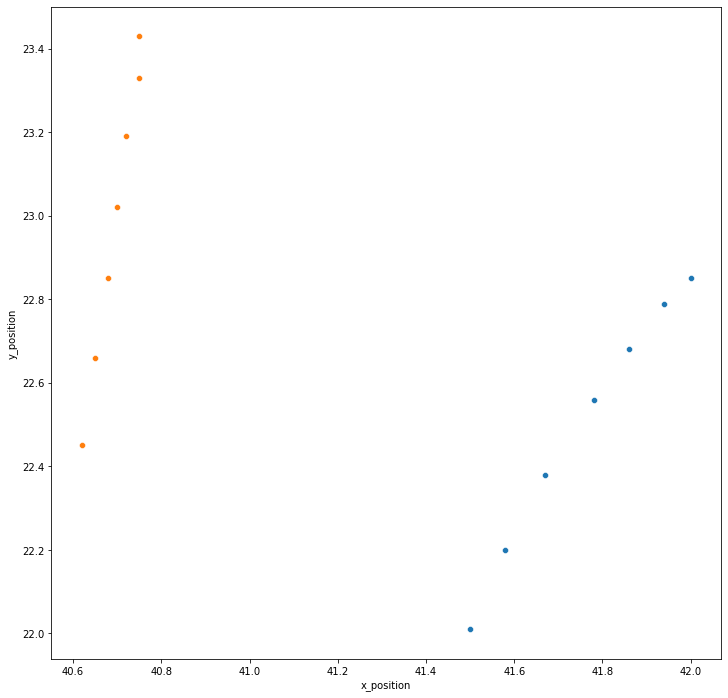

In [ ]:
game_df = train_player_tracking[train_player_tracking.game_play == '58168_003392']
game_df1 = game_df[game_df.team == 'home']
game_df2 = game_df[game_df.team == 'away']
plt.figure(figsize=(12, 12))

colormap = {
    'home': 'blue',
    'away': 'orange'
}

for player_id in game_df.nfl_player_id.unique():
    if player_id not in [41944, 42565]:
        continue
    
    temp = game_df[game_df.nfl_player_id == player_id]
    temp = temp[(temp.step >= 0) & (temp.step <= 6)]
    display(temp)
    team = temp.team.unique()[0]

    sns.scatterplot(data=temp, x='x_position',
                y='y_position',) #sort=False,
                #color=colormap[team])
    
plt.show()

In [ ]:
## 충돌발생 당시 두 선수간의 거리 계산
def calculation_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [ ]:
pos1 = (3,2)
pos2 = (6,6)

calculation_distance(pos1, pos2)

TypeError: ignored

In [ ]:
train_player_tracking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353053 entries, 0 to 1353052
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   game_play      1353053 non-null  object 
 1   game_key       1353053 non-null  int64  
 2   play_id        1353053 non-null  int64  
 3   nfl_player_id  1353053 non-null  int64  
 4   datetime       1353053 non-null  object 
 5   step           1353053 non-null  int64  
 6   team           1353053 non-null  object 
 7   position       1353053 non-null  object 
 8   jersey_number  1353053 non-null  int64  
 9   x_position     1353053 non-null  float64
 10  y_position     1353053 non-null  float64
 11  speed          1353053 non-null  float64
 12  distance       1353053 non-null  float64
 13  direction      1353053 non-null  float64
 14  orientation    1353053 non-null  float64
 15  acceleration   1353053 non-null  float64
 16  sa             1353053 non-null  float64
dtypes: float

In [ ]:
def acc_perpendicular(orient: float, acc: float, sa: float) -> float:
    res = np.sqrt(acc ** 2 - sa ** 2)
    if orient < 0:
        res = -res
    return res

def vectorization(data: pd.DataFrame) -> pd.DataFrame:
    deg2rad = np.pi / 180
    df = data.copy()

    df['x_vel'] = df.apply(lambda x: x.speed * np.cos((90 - x.direction) * deg2rad),
                           axis=1)
    df['y_vel'] = df.apply(lambda x: x.speed * np.sin((90 - x.direction) * deg2rad),
                           axis=1)

    df['sign_perpend'] = df.direction.diff()
    df.sign_perpend = df.sign_perpend.replace({0: np.nan})
    df.sign_perpend = df.sign_perpend.fillna(method='ffill').fillna(method='bfill')
    df['sa_perpend'] = df.apply(lambda x: acc_perpendicular(x.sign_perpend, x.acceleration, x.sa),
                                axis=1)

    df['x_acc'] = df.sa.apply(lambda acc: acc * np.cos((90 - acc) * deg2rad)) + \
                  df.sa_perpend.apply(lambda acc: acc * np.cos(acc * deg2rad))
    df['y_acc'] = df.sa.apply(lambda acc: acc * np.sin((90 - acc) * deg2rad)) + \
                  df.sa_perpend.apply(lambda acc: -acc * np.sin(acc * deg2rad))
    
    return df

def square(x):
    return x ** 2

def relative_quantative(data1: pd.DataFrame, data2: pd.DataFrame):
    ## position, velocitiy, acceleration
    # game_play, nfl_player_id, datetime, step
    if isinstance(data1, pd.DataFrame) and isinstance(data2, pd.DataFrame):
        raise TypeError('Input data type must be DataFrame.')
    elif data1.game_play != data2.game_play:
        raise ValueError('Time range between two dataframes does not match.')

    rel_df = data1[['game_play', 'datetime', 'step']] # 
    rel_df['nfl_player_id_1'] = data1.nfl_player_id
    rel_df['nfl_player_id_2'] = data2.nfl_player_id

    # 선수1과 선수2 사이의 변위, 상대속도, 상대가속도
    vector_quantative = ['x_position', 'y_position', 'x_vel', 'y_vel', 'x_acc', 'y_acc']
    # 선수1과 선수2 사이의 거리, 상대속력, 상대가속력
    scalar_quantative = ['dist', 'speed', 'acc']

    # 선수1과 선수2 사이의 변위, 상대속도, 상대가속도 계산
    for q, idx in enumerate(vector_quantative):
        rel_df[q] = data1[q] - data2[q]
        if idx % 2 == 1:
            prev_q = vector_quantative[idx//2]
            scalar = scalar_quantative[idx//2]
            rel_df[scalar] = rel_df[q].apply(square) + rel_df[prev_q].apply(square)
            rel_df[scalar] = rel_df[scalar].apply(np.sqrt)

    return rel_df

In [ ]:
tracking_ls = []
for game_play in train_player_tracking.game_play.unique():
    game_df = train_player_tracking[train_player_tracking.game_play == game_play]
    temp_ls = []

    for player_id in game_df.nfl_player_id.unique():
        game_player_df = game_df[game_df.nfl_player_id == player_id]
        temp_ls.append(vectorization(game_player_df))

    temp_df = pd.concat(temp_ls, axis=0)
    tracking_ls.append(temp_df)

train_player_tracking = pd.concat(tracking_ls, axis=0)
del tracking_ls
display(train_player_tracking)

,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,...,direction,orientation,acceleration,sa,x_vel,y_vel,sign_perpend,sa_perpend,x_acc,y_acc
0,58580_001136,58580,1136,44830,2021-10-10T21:08:20.900Z,-108,away,CB,22,61.59,...,320.33,263.93,0.71,-0.64,-0.708585,0.854405,-2.34,-0.307409,-0.300255,-0.641609
32,58580_001136,58580,1136,44830,2021-10-10T21:08:21.000Z,-107,away,CB,22,61.52,...,317.99,259.97,0.62,-0.54,-0.722801,0.802470,-2.34,-0.304631,-0.299537,-0.541596
45,58580_001136,58580,1136,44830,2021-10-10T21:08:21.100Z,-106,away,CB,22,61.44,...,315.98,256.74,0.58,-0.49,-0.722706,0.747861,-2.01,-0.310322,-0.306127,-0.491663
77,58580_001136,58580,1136,44830,2021-10-10T21:08:21.200Z,-105,away,CB,22,61.37,...,313.13,253.92,0.55,-0.43,-0.729804,0.683656,-2.85,-0.342929,-0.339695,-0.432040
90,58580_001136,58580,1136,44830,2021-10-10T21:08:21.300Z,-104,away,CB,22,61.29,...,310.05,250.76,0.53,-0.36,-0.742519,0.624152,-3.08,-0.388973,-0.386702,-0.362634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352944,58575_003081,58575,3081,53688,2021-10-10T19:22:06.400Z,136,home,ILB,48,120.53,...,192.41,190.31,0.45,-0.28,-0.872517,-3.965137,-0.07,-0.352278,-0.350903,-0.282163
1352980,58575_003081,58575,3081,53688,2021-10-10T19:22:06.500Z,137,home,ILB,48,120.44,...,192.61,191.24,0.14,-0.14,-0.892902,-3.991344,0.20,0.000000,0.000342,-0.140000
1353006,58575_003081,58575,3081,53688,2021-10-10T19:22:06.600Z,138,home,ILB,48,120.35,...,192.73,192.40,0.54,-0.54,-0.883631,-3.911431,0.12,0.000000,0.005089,-0.539976
1353018,58575_003081,58575,3081,53688,2021-10-10T19:22:06.700Z,139,home,ILB,48,120.27,...,192.59,191.65,0.69,-0.68,-0.865352,-3.874541,-0.14,-0.117047,-0.108977,-0.680191


In [ ]:
train_player_contact_tracking = pd.DataFrame()
interval = 10

for idx, row in train_player_contact.iterrows():
    display(row)
    game_play = row['game_play']
    player1 = row['nfl_player_id_1']
    player2 = row['nfl_player_id_2']

    print(game_play, player1, player2)

    df = train_player_tracking[train_player_tracking.game_play == game_play]

    df1 = df[df.nfl_player_id == player1]
    df2 = df[df.nfl_player_id == player2]

    step_min = df1.step.min()
    step_max = df1.step.max()
    step = row['step']
    
    step_lower = step - interval
    step_upper = step + interval

    if step_lower < step_min:
        step_lower = step_min

    if step_upper > step_max:
        step_upper = step_max

    df1 = df1[df1.step <= step_upper]
    df1 = df1[df1.step >= step_lower]

    display(df1)

    df2 = df2[df2.step <= step_upper]
    df2 = df2[df2.step >= step_lower]
    df2 = df2.drop(columns=['game_play', 'game_key', 'play_id', 'datetime'])

    display(df2)

    # df_tot = pd.concat([df1, df2], axis=0)
    # train_player_contact_tracking = pd.concat([train_player_contact_tracking, df_tot], axis=0)
    contact_df = pd.merge(df1, df2, how='left', on='step', suffixes=('_1', '_2'))
    display(contact_df)

    contact_df['relative_distance'] = contact_df.apply(lambda x: calculation_distance(x.x_position_1, x.y_position_1,
                                                                                      x.x_position_2, x.y_position_2),
                                                       axis=1)
    display(contact_df['relative_distance'])

    break

contact_id         58168_003392_3_41944_42565
game_play                        58168_003392
datetime             2020-09-11T03:01:48.400Z
step                                        3
nfl_player_id_1                         41944
nfl_player_id_2                         42565
contact                                     1
Name: 809, dtype: object

58168_003392 41944 42565


,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
1080868,58168_003392,58168,3392,41944,2020-09-11T03:01:47.400Z,-7,away,DT,92,42.19,22.97,0.11,0.01,334.52,280.05,0.18,0.16
1080890,58168_003392,58168,3392,41944,2020-09-11T03:01:47.500Z,-6,away,DT,92,42.19,22.97,0.09,0.01,331.79,280.05,0.09,0.06
1080906,58168_003392,58168,3392,41944,2020-09-11T03:01:47.600Z,-5,away,DT,92,42.19,22.97,0.04,0.00,309.18,280.05,0.09,-0.09
1080925,58168_003392,58168,3392,41944,2020-09-11T03:01:47.700Z,-4,away,DT,92,42.18,22.97,0.04,0.00,298.41,281.39,0.11,-0.09
1080935,58168_003392,58168,3392,41944,2020-09-11T03:01:47.800Z,-3,away,DT,92,42.17,22.96,0.08,0.01,242.18,283.37,0.20,0.12
1080969,58168_003392,58168,3392,41944,2020-09-11T03:01:47.900Z,-2,away,DT,92,42.11,22.93,0.36,0.07,240.97,282.74,0.62,0.60
1080996,58168_003392,58168,3392,41944,2020-09-11T03:01:48.000Z,-1,away,DT,92,42.07,22.90,0.48,0.05,236.51,280.49,0.73,0.72
1081001,58168_003392,58168,3392,41944,2020-09-11T03:01:48.100Z,0,away,DT,92,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81
1081026,58168_003392,58168,3392,41944,2020-09-11T03:01:48.200Z,1,away,DT,92,41.94,22.79,0.85,0.09,229.50,283.49,0.91,0.90
1081063,58168_003392,58168,3392,41944,2020-09-11T03:01:48.300Z,2,away,DT,92,41.86,22.68,1.18,0.13,220.31,286.64,1.84,1.80


,nfl_player_id,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
1080847,42565,-7,home,C,62,40.74,23.70,0.11,0.01,79.44,70.49,0.20,0.00
1080885,42565,-6,home,C,62,40.75,23.70,0.09,0.01,81.27,69.85,0.16,-0.09
1080911,42565,-5,home,C,62,40.76,23.69,0.09,0.01,108.87,70.86,0.10,-0.08
1080915,42565,-4,home,C,62,40.76,23.68,0.08,0.01,151.44,72.47,0.22,0.03
1080951,42565,-3,home,C,62,40.76,23.65,0.19,0.03,170.80,75.28,0.35,0.30
1080963,42565,-2,home,C,62,40.76,23.59,0.40,0.06,178.20,82.13,0.69,0.67
1080989,42565,-1,home,C,62,40.76,23.52,0.64,0.07,181.76,88.63,0.99,0.99
1081005,42565,0,home,C,62,40.75,23.43,0.86,0.08,183.83,94.13,1.55,1.54
1081034,42565,1,home,C,62,40.75,23.33,1.09,0.11,184.95,97.64,1.39,1.38
1081058,42565,2,home,C,62,40.72,23.19,1.37,0.14,188.26,102.43,1.40,1.39


,game_play,game_key,play_id,nfl_player_id_1,datetime,step,team_1,position_1,jersey_number_1,x_position_1,...,position_2,jersey_number_2,x_position_2,y_position_2,speed_2,distance_2,direction_2,orientation_2,acceleration_2,sa_2
0,58168_003392,58168,3392,41944,2020-09-11T03:01:47.400Z,-7,away,DT,92,42.19,...,C,62,40.74,23.70,0.11,0.01,79.44,70.49,0.20,0.00
1,58168_003392,58168,3392,41944,2020-09-11T03:01:47.500Z,-6,away,DT,92,42.19,...,C,62,40.75,23.70,0.09,0.01,81.27,69.85,0.16,-0.09
2,58168_003392,58168,3392,41944,2020-09-11T03:01:47.600Z,-5,away,DT,92,42.19,...,C,62,40.76,23.69,0.09,0.01,108.87,70.86,0.10,-0.08
3,58168_003392,58168,3392,41944,2020-09-11T03:01:47.700Z,-4,away,DT,92,42.18,...,C,62,40.76,23.68,0.08,0.01,151.44,72.47,0.22,0.03
4,58168_003392,58168,3392,41944,2020-09-11T03:01:47.800Z,-3,away,DT,92,42.17,...,C,62,40.76,23.65,0.19,0.03,170.80,75.28,0.35,0.30
5,58168_003392,58168,3392,41944,2020-09-11T03:01:47.900Z,-2,away,DT,92,42.11,...,C,62,40.76,23.59,0.40,0.06,178.20,82.13,0.69,0.67
6,58168_003392,58168,3392,41944,2020-09-11T03:01:48.000Z,-1,away,DT,92,42.07,...,C,62,40.76,23.52,0.64,0.07,181.76,88.63,0.99,0.99
7,58168_003392,58168,3392,41944,2020-09-11T03:01:48.100Z,0,away,DT,92,42.00,...,C,62,40.75,23.43,0.86,0.08,183.83,94.13,1.55,1.54
8,58168_003392,58168,3392,41944,2020-09-11T03:01:48.200Z,1,away,DT,92,41.94,...,C,62,40.75,23.33,1.09,0.11,184.95,97.64,1.39,1.38
9,58168_003392,58168,3392,41944,2020-09-11T03:01:48.300Z,2,away,DT,92,41.86,...,C,62,40.72,23.19,1.37,0.14,188.26,102.43,1.40,1.39


0     1.623392
1     1.614466
2     1.601031
3     1.587608
4     1.569777
5     1.502698
6     1.449310
7     1.378006
8     1.306790
9     1.248879
10    1.173882
11    1.095901
12    1.037545
13    0.983870
14    0.930591
15    0.919239
16    0.906973
17    0.892020
18    0.887299
19    0.899389
20    0.905207
Name: relative_distance, dtype: float64

In [ ]:
train_player_contact_tracking

In [ ]:
pd.merge(train_player_contact, test_player_tracking, left_on='key', right_on='key', how='left')

In [ ]:
train_player_contact

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
809,58168_003392_3_41944_42565,58168_003392,2020-09-11T03:01:48.400Z,3,41944,42565,1
1062,58168_003392_4_41944_42565,58168_003392,2020-09-11T03:01:48.500Z,4,41944,42565,1
1163,58168_003392_4_37084_38567,58168_003392,2020-09-11T03:01:48.500Z,4,37084,38567,1
1289,58168_003392_5_43854_46445,58168_003392,2020-09-11T03:01:48.600Z,5,43854,46445,1
1315,58168_003392_5_41944_42565,58168_003392,2020-09-11T03:01:48.600Z,5,41944,42565,1
...,...,...,...,...,...,...,...
4708597,58582_003121_40_45009_46284,58582_003121,2021-10-12T02:42:24.000Z,40,45009,46284,1
4711814,58582_003121_53_39971_46155,58582_003121,2021-10-12T02:42:25.300Z,53,39971,46155,1
4712067,58582_003121_54_39971_46155,58582_003121,2021-10-12T02:42:25.400Z,54,39971,46155,1
4712320,58582_003121_55_39971_46155,58582_003121,2021-10-12T02:42:25.500Z,55,39971,46155,1


In [ ]:
train_video_metadata

,game_play,game_key,play_id,view,start_time,end_time,snap_time
0,58168_003392,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
1,58168_003392,58168,3392,Sideline,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
2,58172_003247,58172,3247,Endzone,2020-09-13T19:30:42.414Z,2020-09-13T19:31:00.524Z,2020-09-13T19:30:47.414Z
3,58172_003247,58172,3247,Sideline,2020-09-13T19:30:42.414Z,2020-09-13T19:31:00.524Z,2020-09-13T19:30:47.414Z
4,58173_003606,58173,3606,Endzone,2020-09-13T19:45:07.527Z,2020-09-13T19:45:26.438Z,2020-09-13T19:45:12.527Z
...,...,...,...,...,...,...,...
475,58580_003294,58580,3294,Sideline,2021-10-10T22:49:20.085Z,2021-10-10T22:49:33.891Z,2021-10-10T22:49:25.085Z
476,58581_000040,58581,40,Endzone,2021-10-11T00:22:39.997Z,2021-10-11T00:22:52.068Z,2021-10-11T00:22:44.997Z
477,58581_000040,58581,40,Sideline,2021-10-11T00:22:39.997Z,2021-10-11T00:22:52.068Z,2021-10-11T00:22:44.997Z
478,58582_003121,58582,3121,Endzone,2021-10-12T02:42:15.078Z,2021-10-12T02:42:29.118Z,2021-10-12T02:42:20.078Z


In [ ]:
test_video_metadata

,game_play,game_key,play_id,view,start_time,end_time,snap_time
0,58168_003392,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
1,58168_003392,58168,3392,Sideline,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
2,58172_003247,58172,3247,Endzone,2020-09-13T19:30:42.414Z,2020-09-13T19:31:00.524Z,2020-09-13T19:30:47.414Z
3,58172_003247,58172,3247,Sideline,2020-09-13T19:30:42.414Z,2020-09-13T19:31:00.524Z,2020-09-13T19:30:47.414Z


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.metrics import matthews_corrcoef

# Read in data files
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/kaggle/Player-Contact-Detection/data'

# Labels and sample submission
labels = pd.read_csv(f"{BASE_DIR}/train_labels.csv", parse_dates=["datetime"])
ss = pd.read_csv(f"{BASE_DIR}/sample_submission.csv")

# Player tracking data
tr_tracking = pd.read_csv(
    f"{BASE_DIR}/train_player_tracking.csv", parse_dates=["datetime"]
)
te_tracking = pd.read_csv(
    f"{BASE_DIR}/test_player_tracking.csv", parse_dates=["datetime"]
)

# Baseline helmet detection labels
tr_helmets = pd.read_csv(f"{BASE_DIR}/train_baseline_helmets.csv")
te_helmets = pd.read_csv(f"{BASE_DIR}/test_baseline_helmets.csv")

# Video metadata with start/stop timestamps
tr_video_metadata = pd.read_csv(
    f"{BASE_DIR}/train_video_metadata.csv",
    parse_dates=["start_time", "end_time", "snap_time"],
)

In [ ]:
import os
import cv2
import subprocess
from IPython.display import Video, display
import pandas as pd

def video_with_helmets(video_path: str, baseline_boxes: pd.DataFrame,
                       verbose=True) -> str:
    """
    Annotates a video with baseline model boxes and labels.
    """
    VIDEO_CODEC = "MP4V"
    HELMET_COLOR = (0, 0, 0)  # Black
    video_name = os.path.basename(video_path)
    if verbose:
        print(f"Running for {video_name}")
    baseline_boxes = baseline_boxes.copy()

    vidcap = cv2.VideoCapture(video_path)
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    width = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    output_path = "labeled_" + video_name
    tmp_output_path = "tmp_" + output_path
    output_video = cv2.VideoWriter(
        tmp_output_path, cv2.VideoWriter_fourcc(*VIDEO_CODEC), fps, (width, height)
    )

    frame = 0
    while True:
        it_worked, img = vidcap.read()
        if not it_worked:
            break
        # We need to add 1 to the frame count to match the label frame index
        # that starts at 1
        frame += 1

        # Let's add a frame index to the video so we can track where we are
        img_name = video_name.replace(".mp4", "")
        cv2.putText(
            img,
            img_name,
            (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            HELMET_COLOR,
            thickness=1,
        )

        cv2.putText(
            img,
            str(frame),
            (1280 - 90, 720 - 20),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            HELMET_COLOR,
            thickness=1,
        )

        # Now, add the boxes
        boxes = baseline_boxes.query("video == @video_name and frame == @frame")
        for box in boxes.itertuples(index=False):
            cv2.rectangle(
                img,
                (box.left, box.top),
                (box.left + box.width, box.top + box.height),
                HELMET_COLOR,
                thickness=1,
            )
            cv2.putText(
                img,
                box.player_label,
                (box.left + 1, max(0, box.top - 20)),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                HELMET_COLOR,
                thickness=1,
            )

        output_video.write(img)
    output_video.release()
    # Not all browsers support the codec, we will re-load the file at tmp_output_path
    # and convert to a codec that is more broadly readable using ffmpeg
    if os.path.exists(output_path):
        os.remove(output_path)
    subprocess.run(
        [
            "ffmpeg",
            "-i",
            tmp_output_path,
            "-crf",
            "18",
            "-preset",
            "veryfast",
            "-hide_banner",
            "-loglevel",
            "error",
            "-vcodec",
            "libx264",
            output_path,
        ]
    )
    os.remove(tmp_output_path)

    return output_path

In [ ]:
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/kaggle/Player-Contact-Detection/data'

example_video = f"{BASE_DIR}/train/58168_003392_Sideline.mp4"
output_video = video_with_helmets(example_video, tr_helmets)

frac = 0.65  # scaling factor for display
display(
    Video(data=output_video, embed=True, height=int(720 * frac), width=int(1280 * frac))
)